<a href="https://colab.research.google.com/github/TangNgheQuangHuy/TangNgheQuangHuy-20146255-fuzzylogic/blob/main/AI_W4_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e2e1bb5c14b8bb78ba8d7fb9d61b78181a884a308a2fc11a3cbe4dcbb992e797
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


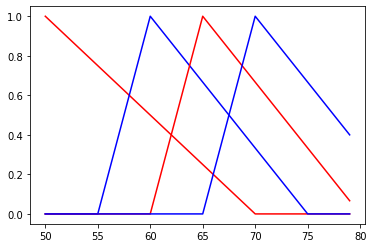

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50,80,1)
slow = fuzz.trimf(x,[50,50,70])
medium = fuzz.trimf(x,[55,60,75])
medium_fast = fuzz.trimf(x,[60,65,80])
full_speed = fuzz.trimf(x,[65,70,85])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label = 'slow')
plt.plot(x,medium,'b',linewidth=1.5,label = 'slow')
plt.plot(x,medium_fast,'r',linewidth=1.5,label = 'slow')
plt.plot(x,full_speed,'b',linewidth=1.5,label = 'slow')

11.782051282051283


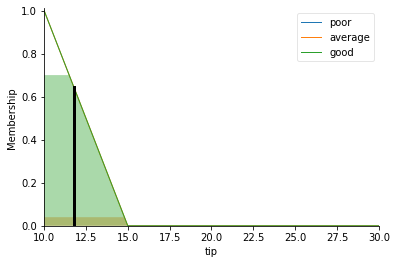

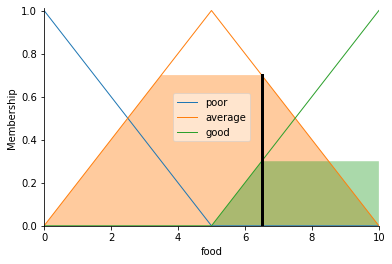

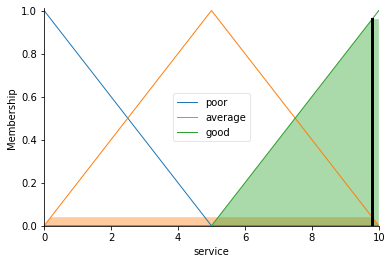

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['poor'] = fuzz.trimf(tip.universe,[5,5,10])
tip['average'] = fuzz.trimf(tip.universe,[5,10,15])
tip['good'] = fuzz.trimf(tip.universe,[10,10,15])


rule1 = ctrl.Rule(food['poor']& service['poor'],tip['poor'])
rule2 = ctrl.Rule(food['poor']& service['average'],tip['poor'])
rule3 = ctrl.Rule(food['poor']& service['good'],tip['average'])
rule4 = ctrl.Rule(food['average']& service['poor'],tip['poor'])
rule5 = ctrl.Rule(food['average']& service['average'],tip['average'])
rule6 = ctrl.Rule(food['average']& service['good'],tip['good'])
rule7 = ctrl.Rule(food['good']& service['poor'],tip['average'])
rule8 = ctrl.Rule(food['good']& service['average'],tip['good'])
rule9 = ctrl.Rule(food['good']& service['good'],tip['good'])

# Data
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)
food.view(sim = tipping)
service.view(sim = tipping)

62.99763593380626


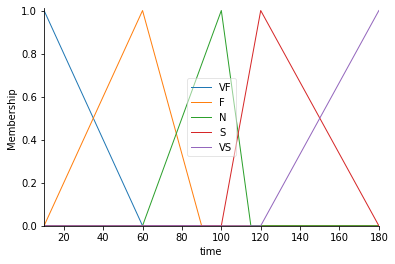

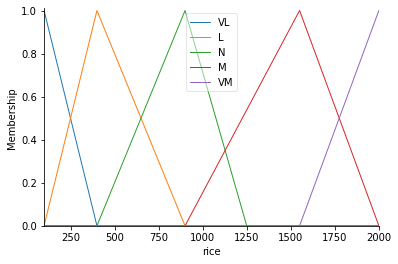

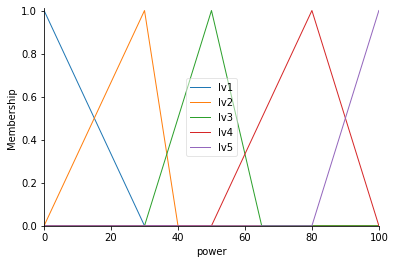

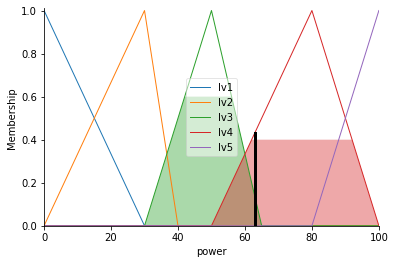

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['VF'] = fuzz.trimf(time.universe,[10,10,60])
time['F'] = fuzz.trimf(time.universe,[10,60,90])
time['N'] = fuzz.trimf(time.universe,[60,100,115])
time['S'] = fuzz.trimf(time.universe,[100,120,180])
time['VS'] = fuzz.trimf(time.universe,[120,180,180])

rice['VL'] = fuzz.trimf(rice.universe,[100,100,400])
rice['L'] = fuzz.trimf(rice.universe,[100,400,900])
rice['N'] = fuzz.trimf(rice.universe,[400,900,1250])
rice['M'] = fuzz.trimf(rice.universe,[900,1550,2000])
rice['VM'] = fuzz.trimf(rice.universe,[1550,2000,2000])

power['lv1'] = fuzz.trimf(power.universe,[0,0,30])
power['lv2'] = fuzz.trimf(power.universe,[0,30,40])
power['lv3']= fuzz.trimf(power.universe,[30,50,65])
power['lv4'] = fuzz.trimf(power.universe,[50,80,100])
power['lv5'] = fuzz.trimf(power.universe,[80,100,100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['VF']& rice['VL'],power['lv1'])
rule2 = ctrl.Rule(time['VF']& rice['L'],power['lv1'])
rule3 = ctrl.Rule(time['VF']& rice['N'],power['lv1'])
rule4 = ctrl.Rule(time['VF']& rice['M'],power['lv2'])
rule5 = ctrl.Rule(time['VF']& rice['VM'],power['lv2'])
rule6 = ctrl.Rule(time['F']& rice['VL'],power['lv1'])
rule7 = ctrl.Rule(time['F']& rice['L'],power['lv1'])
rule8 = ctrl.Rule(time['F']& rice['N'],power['lv2'])
rule9 = ctrl.Rule(time['F']& rice['M'],power['lv2'])
rule10 = ctrl.Rule(time['F']& rice['VM'],power['lv3'])
rule11 = ctrl.Rule(time['N']& rice['VL'],power['lv2'])
rule12 = ctrl.Rule(time['N']& rice['L'],power['lv2'])
rule13 = ctrl.Rule(time['N']& rice['N'],power['lv3'])
rule14 = ctrl.Rule(time['N']& rice['M'],power['lv3'])
rule15 = ctrl.Rule(time['N']& rice['VM'],power['lv4'])
rule16 = ctrl.Rule(time['S']& rice['VL'],power['lv3'])
rule17 = ctrl.Rule(time['S']& rice['L'],power['lv3'])
rule18 = ctrl.Rule(time['S']& rice['N'],power['lv4'])
rule19 = ctrl.Rule(time['S']& rice['M'],power['lv4'])
rule20 = ctrl.Rule(time['S']& rice['VM'],power['lv5'])
rule21 = ctrl.Rule(time['VS']& rice['VL'],power['lv3'])
rule22 = ctrl.Rule(time['VS']& rice['L'],power['lv3'])
rule23 = ctrl.Rule(time['VS']& rice['N'],power['lv5'])
rule24 = ctrl.Rule(time['VS']& rice['M'],power['lv5'])
rule25 = ctrl.Rule(time['VS']& rice['VM'],power['lv5'])

#
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 120
powering.input['rice'] = 600
powering.compute()
print(powering.output['power'])
power.view(sim = powering)